In [1]:
# -*- coding: utf-8 -*-
# Licensed under a 3-clause BSD style license - see LICENSE.rst
import logging
import os
import warnings
from collections import OrderedDict
from multiprocessing import Pool

import astropy
from astropy.table import Table, hstack
import astropy.units as u
from astropy.io import ascii
from astropy.constants import alpha, c, e, hbar, m_e, m_p, sigma_sb
from astropy.utils.data import get_pkg_data_filename
from astropy.cosmology import WMAP9 as cosmo

import numpy as np
import matplotlib.pyplot as plt

from Validator import (
    validate_array,
    validate_physical_type,
    validate_scalar,
)
#from .model_utils import memoize
from Utils import trapz_loglog

import Models
import Radiative
import grbloader
from GRBmodel import GRBModel1
from Models import EblAbsorptionModel

from astropy.units import def_physical_type

try:
    #def_physical_type(u.Unit("1 / eV"), "differential energy")
    def_physical_type(u.erg / u.cm**2 / u.s, "flux")
    def_physical_type(u.Unit("1/(s cm2 erg)"), "differential flux")
    def_physical_type(u.Unit("1/(s erg)"), "differential power")
    def_physical_type(u.Unit("1/TeV"), "differential energy")
    def_physical_type(u.Unit("1/cm3"), "number density")
    def_physical_type(u.Unit("1/(eV cm3)"), "differential number density")

except ValueError:
    print("New quantities already defined")

New quantities already defined


In [2]:
Eiso = 8e51  # erg
density = 0.5  # cm-3
redshift = 0.0000004
tstart = 68   # s
tstop = 110   # s

#-----list of parameters of a electron distribution (log10) ------

eta_e=-1.44
Ebreak=-1.62
Index2=3.17
Ec=1.32  # cutoff energy in TeV
B=0.29
#B=100*u.uG

Dl = cosmo.luminosity_distance(redshift).to(u.kpc)
print(Dl)

1.7299050902445734 kpc


In [3]:

#---------------------------------------------------------------------------
    
"""
Initialize the GRBModelling class with the data and the given parameters
"""
grb = GRBModel1(eiso=Eiso, dens=density, tstart=tstart, tstop=tstop, redshift=redshift,
                        pars=[eta_e, Ebreak,Index2, Ec,  B],
                        labels=['log10(eta_e)', 'log10(Ebreak)', 'Index2', 'log10(Ec)', 'log10(B)'],scenario='ISM',cooling_constrain=False,data=None)


the code can be used only for computation of theoretical curves


In [4]:
emin=1e-9
emax=1e14
bins = int(np.log10(emax/emin) * 20.)  # use 20 bins per decade
ener = Table([np.logspace(np.log10(emin), np.log10(emax), bins) * u.eV], names=['energy'])  # energy in eV

grb._SSCmodel_ind1fixed(pars=[eta_e, Ebreak,Index2, Ec, B],data=ener)

(<Quantity [1.27279319e-11, 1.48446426e-11, 1.73133715e-11, 2.01926607e-11,
            2.35507883e-11, 2.74673870e-11, 3.20353332e-11, 3.73629486e-11,
            4.35765696e-11, 5.08235427e-11, 5.92757188e-11, 6.91335282e-11,
            8.06307340e-11, 9.40399746e-11, 1.09679230e-10, 1.27919360e-10,
            1.49192902e-10, 1.74004326e-10, 2.02941996e-10, 2.36692123e-10,
            2.76055040e-10, 3.21964177e-10, 3.75508199e-10, 4.37956817e-10,
            5.10790903e-10, 5.95737603e-10, 6.94811294e-10, 8.10361352e-10,
            9.45127864e-10, 1.10230660e-09, 1.28562481e-09, 1.49942958e-09,
            1.74879096e-09, 2.03962213e-09, 2.37881969e-09, 2.77442716e-09,
            3.23582569e-09, 3.77395661e-09, 4.40158077e-09, 5.13358122e-09,
            5.98731611e-09, 6.98303029e-09, 8.14433538e-09, 9.49876970e-09,
            1.10784512e-08, 1.29208393e-08, 1.50696228e-08, 1.75757562e-08,
            2.04986676e-08, 2.39076684e-08, 2.78835964e-08, 3.25207329e-08,
            

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


---------------------------------------------------------------------------------------------------
Γ factor = 63.40686227993884
η_B = 0.025029284297040204
η_e = 0.03630780547701014
Shell Radius 8.581697887600152e+16 cm
---------------------------------------------------------------------------------------------------


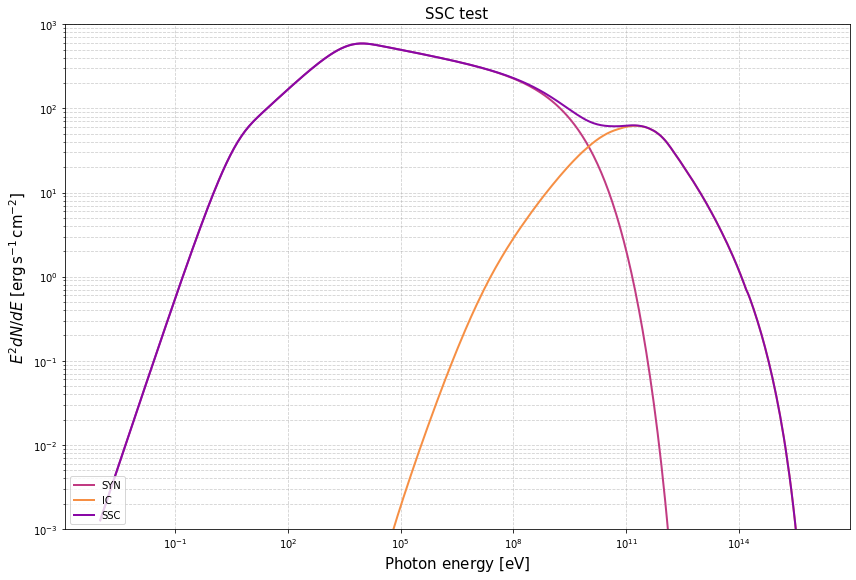

In [5]:
grb.plot_sed(1e-3,1e16,6)


### Comparinson with the NSBH prediction?

In [6]:
#from astropy.cosmology import Planck18
z=0.1

n0=0.001,    # circumburst density in cm^{-3}
p= 2.3,    # electron energy distribution index
epsilon_e=0.2,    # epsilon_e
epsilon_B=0.02, # 4*10**(-3),   # epsilon_B
#d_L= Planck18.luminosity_distance(z).value*3.086*10**24, # Luminosity distance in cm 1.8e28
z=0.1
Eiso = 8e51  # erg


In [7]:
Eiso = 8e51  # erg
density = 0.01  # cm-3
redshift = 0.1
tstart = 68   # s
tstop = 108   # s

#-----list of parameters of a electron distribution (log10) ------

eta_e=-1.44
Ebreak=-1.62
Index2=3.3
Ec=1.32  # cutoff energy in TeV
B=0.8

In [8]:
grb = GRBModel1(eiso=Eiso, dens=density, tstart=tstart, tstop=tstop, redshift=redshift,
                        pars=[eta_e, Ebreak,Index2, Ec,  B],
                        labels=['log10(eta_e)', 'log10(Ebreak)', 'Index2', 'log10(Ec)', 'log10(B)'],scenario='ISM',cooling_constrain=False,data=None)


the code can be used only for computation of theoretical curves


In [9]:
emin=1e-9
emax=1e14
bins = int(np.log10(emax/emin) * 20.)  # use 20 bins per decade
ener = Table([np.logspace(np.log10(emin), np.log10(emax), bins) * u.eV], names=['energy'])  # energy in eV

grb._SSCmodel_ind1fixed(pars=[eta_e, Ebreak,Index2, Ec, B],data=ener)

(<Quantity [1.69579775e-22, 1.97781635e-22, 2.30673588e-22, 2.69035618e-22,
            3.13777421e-22, 3.65959981e-22, 4.26820731e-22, 4.97802889e-22,
            5.80589692e-22, 6.77144302e-22, 7.89756367e-22, 9.21096311e-22,
            1.07427866e-21, 1.25293591e-21, 1.46130464e-21, 1.70432600e-21,
            1.98776288e-21, 2.31833655e-21, 2.70388606e-21, 3.15355414e-21,
            3.67800399e-21, 4.28967214e-21, 5.00306338e-21, 5.83509468e-21,
            6.80549642e-21, 7.93728020e-21, 9.25728456e-21, 1.07968114e-20,
            1.25923682e-20, 1.46865339e-20, 1.71289685e-20, 1.99775906e-20,
            2.32999509e-20, 2.71748341e-20, 3.16941271e-20, 3.69649981e-20,
            4.31124377e-20, 5.02822230e-20, 5.86443745e-20, 6.83971877e-20,
            7.97719356e-20, 9.30383528e-20, 1.08511032e-19, 1.26556884e-19,
            1.47603837e-19, 1.72150989e-19, 2.00780435e-19, 2.34171080e-19,
            2.73114729e-19, 3.18534870e-19, 3.71508571e-19, 4.33292018e-19,
            

In [ ]:

print(grb.eta_b)

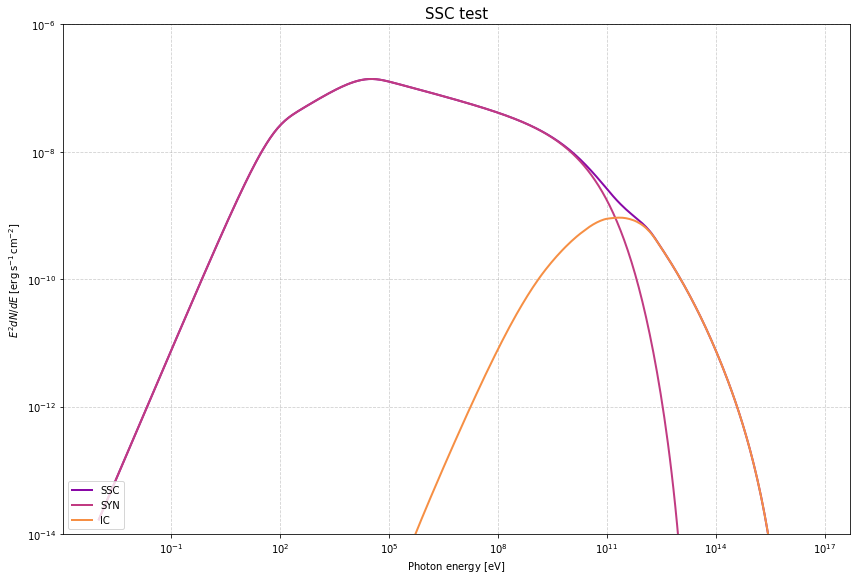

In [10]:
grb.plot_sed_fast(1e-3,5e16,1e-14,1e-6)

---------------------------------------------------------------------------------------------------
Γ factor = 103.83595544667675
η_B = 4.886472215121118
η_e = 0.03630780547701014
Shell Radius 2.275563132336527e+17 cm
---------------------------------------------------------------------------------------------------


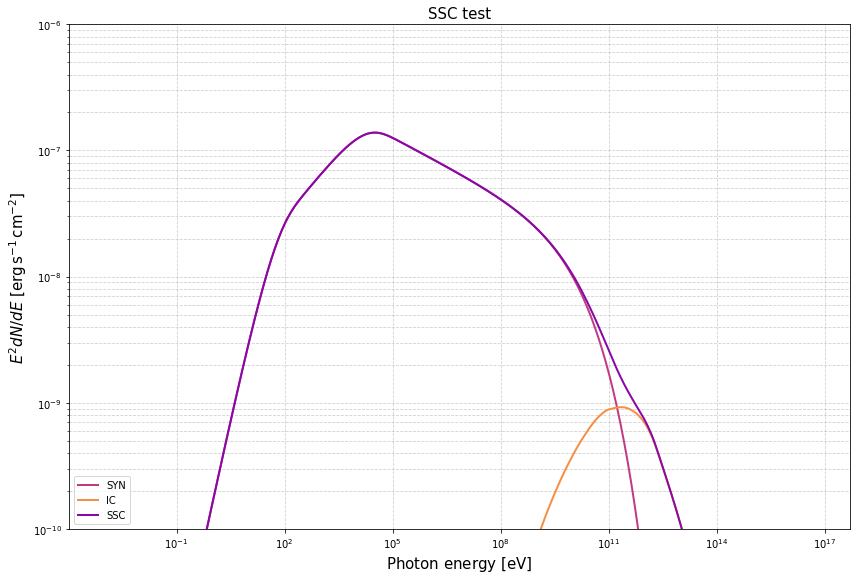

In [11]:
grb.plot_sed(1e-3,5e16,4)

## ------------------------------ Multiple plots -----------------------------------

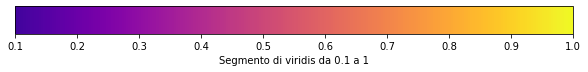

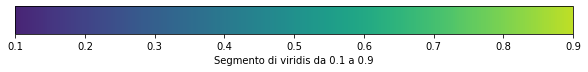

In [12]:
from matplotlib import cm
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.colorbar import ColorbarBase

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval:.2f},{maxval:.2f})',
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

vmin = 0.1
vmax = 1
original_cmap = plt.cm.plasma

cmap1 = truncate_colormap(original_cmap, vmin, vmax)
fig, ax = plt.subplots(figsize=(10, 1))
fig.subplots_adjust(bottom=0.5)
norm = Normalize(vmin, vmax)  # da 0 a 1 perché stai solo mostrando il segmento
cb = ColorbarBase(ax,cmap=cmap1,norm=norm,orientation='horizontal')
cb.set_label(f'Segmento di viridis da {vmin} a {vmax}')
plt.show()

vmin = 0.1
vmax = 0.9
original_cmap2 = plt.cm.viridis

cmap2 = truncate_colormap(original_cmap2, vmin, vmax)
fig, ax = plt.subplots(figsize=(10, 1))
fig.subplots_adjust(bottom=0.5)
norm = Normalize(vmin, vmax)  # da 0 a 1 perché stai solo mostrando il segmento
cb = ColorbarBase(ax,cmap=cmap2,norm=norm,orientation='horizontal')
cb.set_label(f'Segmento di viridis da {vmin} a {vmax}')
plt.show()


In [13]:
############################################### PARAMETERS ####################################

Eiso = 8e51  # erg
density = 0.01 #0.5  # cm-3
redshift = 0.1
tstart = 68   # s
tstop = 110   # s

#-----list of parameters of a electron distribution (log10) ------

eta_e=-1.44
Ebreak=-1.62
Index2=3.3
Ec=1.32  # cutoff energy in TeV
B=0.25

#################################################################################################

the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves


PermissionError: [Errno 13] Permission denied: '/media/tobiazenbook/PortableSSD/JOB/Projects/GRB-modelling/Plots-April30/plot1'

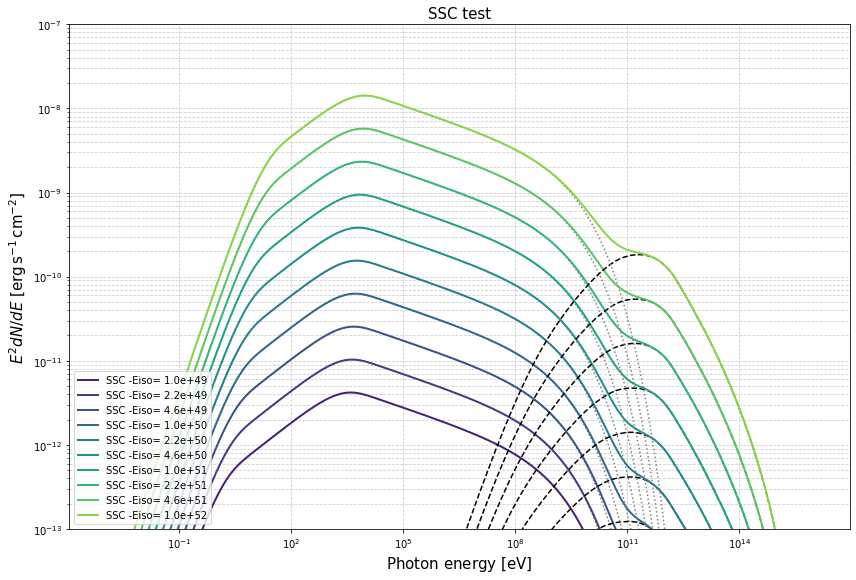

In [14]:
multi_Eiso=np.logspace(49,52,10)
#multi_Eiso = [8e51]

# Plot
plt.figure(figsize=(12,8))
plt.rc('font', family='sans')
plt.rc('mathtext', fontset='custom')

#plt.loglog(spectrum_energy,sed_SYN,lw=2,label='Sync',c=cmap2(0.9))
color=0

for Eiso in multi_Eiso:
    
    grb = GRBModel1(eiso=Eiso, dens=density, tstart=tstart, tstop=tstop, redshift=redshift,
                        pars=[eta_e, Ebreak,Index2, Ec,  B],
                        labels=['log10(eta_e)', 'log10(Ebreak)', 'Index2', 'log10(Ec)', 'log10(B)'],scenario='ISM',cooling_constrain=False,data=None)
    emin=1e-3
    emax=1e16
    bins = int(np.log10(emax/emin) * 20.)  # use 20 bins per decade
    ener = Table([np.logspace(np.log10(emin), np.log10(emax), bins) * u.eV], names=['energy'])  # energy in eV

    model=grb._SSCmodel_ind1fixed(pars=[eta_e, Ebreak,Index2, Ec, B],data=ener)
    
    SSC=model[0]
    
    ymax=np.max(SSC).value
    ymin=np.min(SSC).value
    
    ordine = int(np.ceil(np.log10(ymax)))
    ymax = 10**ordine
    ymin = 10**(ordine - 6)
    
    #grb.plot_sed(1e-3,1e16,6)
    spectrum_energy=np.logspace(np.log10(emin), np.log10(emax), bins) * u.eV
    
    plt.loglog(spectrum_energy,grb.ic_compGG2,lw=1.5,ls='--',c="black")
    plt.loglog(spectrum_energy,grb.synch_compGG2,lw=1.5,ls=':',c="gray")
    plt.loglog(spectrum_energy,SSC,lw=2,label=f'SSC -Eiso= {"{:.1e}".format(Eiso)}',c=cmap2(color))
    color=color+0.1

plt.xlabel('Photon energy [{0}]'.format(spectrum_energy.unit.to_string('latex_inline')),fontsize=15)
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(model[0].unit.to_string('latex_inline')),fontsize=15)

plt.ylim(ymin, ymax)
#plt.xlim(1e-3,5e16)
plt.tight_layout()
plt.legend(loc='lower left')


plt.title(f"SSC test",fontsize=15)
plt.grid(True, which="both", linestyle="--", alpha=0.6)

plt.savefig("/media/tobiazenbook/PortableSSD/JOB/Projects/GRB-modelling/Plots-April30/plot1", format="jpg", dpi=300)
plt.show()

In [3]:
############################################### PARAMETERS ####################################

Eiso = 8e51  # erg
density = 0.01 #0.5  # cm-3
redshift = 0.1
tstart = 68   # s
tstop = 110   # s

#-----list of parameters of a electron distribution (log10) ------

eta_e=-1.44
Ebreak=-1.62
Index2=3.3
Ec=1.32  # cutoff energy in TeV
B=0.25

#################################################################################################

the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves


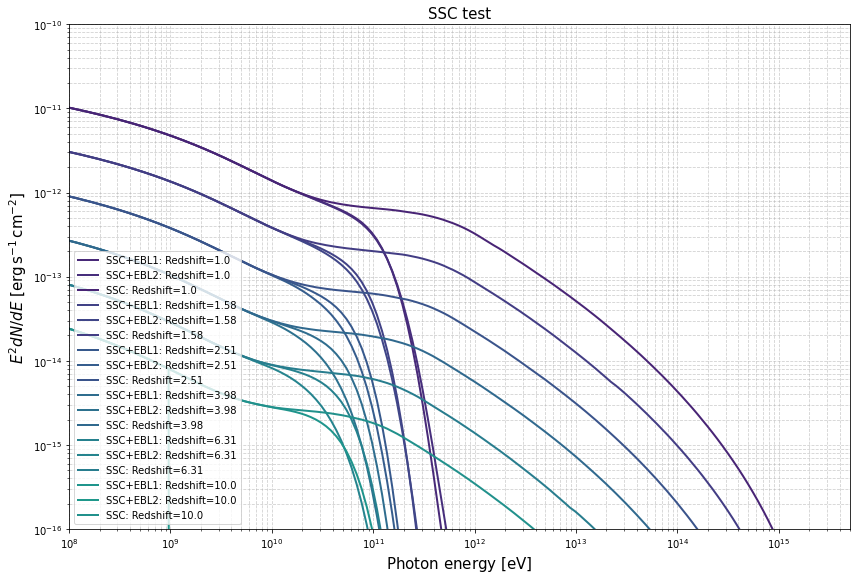

In [12]:
multi_redshift=np.logspace(0,1,6)
#multi_Eiso = [8e51]

# Plot
plt.figure(figsize=(12,8))
plt.rc('font', family='sans')
plt.rc('mathtext', fontset='custom')

#plt.loglog(spectrum_energy,sed_SYN,lw=2,label='Sync',c=cmap2(0.9))
color=0

ymax=0
ymin=0
for redshift in multi_redshift:
    
    grb = GRBModel1(eiso=Eiso, dens=density, tstart=tstart, tstop=tstop, redshift=redshift,
                        pars=[eta_e, Ebreak,Index2, Ec,  B],
                        labels=['log10(eta_e)', 'log10(Ebreak)', 'Index2', 'log10(Ec)', 'log10(B)'],scenario='ISM',cooling_constrain=False,data=None)
    ebl1=EblAbsorptionModel(redshift)
    ebl2=EblAbsorptionModel(redshift,"Gilmore2012")
    
    
    emin=1e-3
    emax=1e16
    bins = int(np.log10(emax/emin) * 20.)  # use 20 bins per decade
    ener = Table([np.logspace(np.log10(emin), np.log10(emax), bins) * u.eV], names=['energy'])  # energy in eV

    model=grb._SSCmodel_ind1fixed(pars=[eta_e, Ebreak,Index2, Ec, B],data=ener)
    
    SSC=model[0]
    
    max=np.max(SSC).value
    #min=np.min(SSC).value
    
    ordine = int(np.ceil(np.log10(max)))
    max = 10**ordine
    min = 10**(ordine - 6)
    
    if max>ymax:
        ymax=max
        ymin=min
    
    
    #grb.plot_sed(1e-3,1e16,6)
    spectrum_energy=np.logspace(np.log10(emin), np.log10(emax), bins) * u.eV
    
    trasmission1=ebl1.transmission(spectrum_energy)
    trasmission2=ebl2.transmission(spectrum_energy)
    SSC_ebl1=SSC*trasmission1
    SSC_ebl2=SSC*trasmission2
    
    #plt.loglog(spectrum_energy,grb.ic_compGG2,lw=1.5,ls='--',c="black")
    #plt.loglog(spectrum_energy,grb.synch_compGG2,lw=1.5,ls=':',c="gray")
    plt.loglog(spectrum_energy,SSC_ebl1,lw=2,label=f'SSC+EBL1: Redshift={round(redshift,2)}',c=cmap2(color+0.02))
    plt.loglog(spectrum_energy,SSC_ebl2,lw=2,label=f'SSC+EBL2: Redshift={round(redshift,2)}',c=cmap2(color+0.04))
    plt.loglog(spectrum_energy,SSC,lw=2,label=f'SSC: Redshift={round(redshift,2)}',c=cmap2(color))
    
    color=color+0.1

plt.xlabel('Photon energy [{0}]'.format(spectrum_energy.unit.to_string('latex_inline')),fontsize=15)
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(model[0].unit.to_string('latex_inline')),fontsize=15)

plt.ylim(ymin, ymax)
plt.xlim(1e8,5e15)
plt.tight_layout()
plt.legend(loc='lower left')


plt.title(f"SSC test",fontsize=15)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.savefig("/media/tobiazenbook/PortableSSD/JOB/Projects/GRB-modelling/Plots-April30/plot2+EBL1vsEBL2zoom", format="pdf", dpi=300)

In [19]:
############################################### PARAMETERS ####################################

Eiso = 8e51  # erg
density = 0.01 #0.5  # cm-3
redshift = 0.1
tstart = 68   # s
tstop = 110   # s

#-----list of parameters of a electron distribution (log10) ------

eta_e=-1.44
Ebreak=-1.62
Index2=3.3
Ec=1.32  # cutoff energy in TeV
B=0.25

#################################################################################################

the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves
the code can be used only for computation of theoretical curves


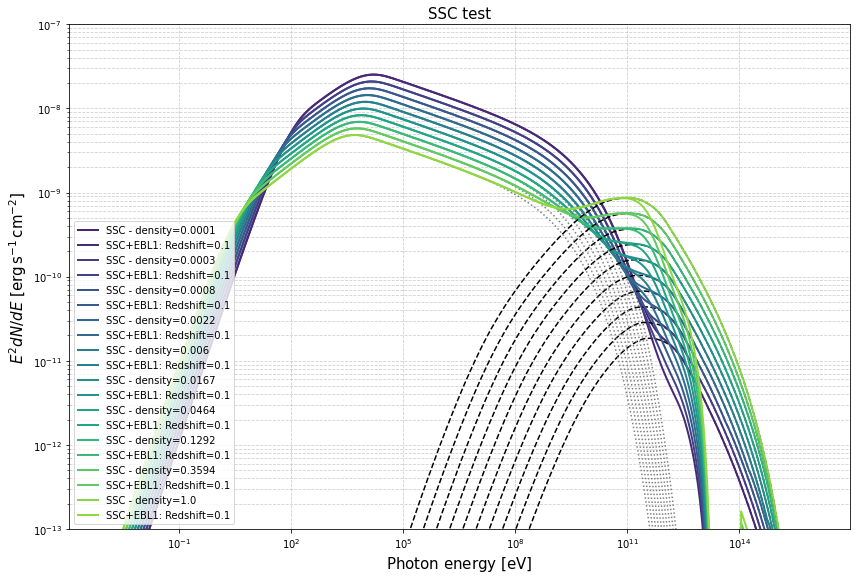

In [20]:
multi_density=np.logspace(-4,0,10)
#multi_Eiso = [8e51]

# Plot
plt.figure(figsize=(12,8))
plt.rc('font', family='sans')
plt.rc('mathtext', fontset='custom')

#plt.loglog(spectrum_energy,sed_SYN,lw=2,label='Sync',c=cmap2(0.9))
color=0

ymax=0
ymin=0
for density in multi_density:
    
    grb = GRBModel1(eiso=Eiso, dens=density, tstart=tstart, tstop=tstop, redshift=redshift,
                        pars=[eta_e, Ebreak,Index2, Ec,  B],
                        labels=['log10(eta_e)', 'log10(Ebreak)', 'Index2', 'log10(Ec)', 'log10(B)'],scenario='ISM',cooling_constrain=False,data=None)
    ebl2=EblAbsorptionModel(redshift,"Gilmore2012")
    
    emin=1e-3
    emax=1e16
    bins = int(np.log10(emax/emin) * 20.)  # use 20 bins per decade
    ener = Table([np.logspace(np.log10(emin), np.log10(emax), bins) * u.eV], names=['energy'])  # energy in eV

    model=grb._SSCmodel_ind1fixed(pars=[eta_e, Ebreak,Index2, Ec, B],data=ener)
    
    SSC=model[0]
    
    max=np.max(SSC).value
    #min=np.min(SSC).value
    
    ordine = int(np.ceil(np.log10(max)))
    max = 10**ordine
    min = 10**(ordine - 6)
    
    if max>ymax:
        ymax=max
        ymin=min
    
    
    #grb.plot_sed(1e-3,1e16,6)
    spectrum_energy=np.logspace(np.log10(emin), np.log10(emax), bins) * u.eV
    
    trasmission2=ebl2.transmission(spectrum_energy)
    SSC_ebl2=SSC*trasmission2
    
    plt.loglog(spectrum_energy,grb.ic_compGG2,lw=1.5,ls='--',c="black")
    plt.loglog(spectrum_energy,grb.synch_compGG2,lw=1.5,ls=':',c="gray")
    plt.loglog(spectrum_energy,SSC,lw=2,label=f'SSC - density={round(density,4)}',c=cmap2(color))
    plt.loglog(spectrum_energy,SSC_ebl2,lw=2,label=f'SSC+EBL1: Redshift={round(redshift,2)}',c=cmap2(color+0.02))
    color=color+0.1

plt.xlabel('Photon energy [{0}]'.format(spectrum_energy.unit.to_string('latex_inline')),fontsize=15)
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(model[0].unit.to_string('latex_inline')),fontsize=15)

plt.ylim(ymin, ymax)
#plt.xlim(1e-3,5e16)
plt.tight_layout()
plt.legend(loc='lower left')


plt.title(f"SSC test",fontsize=15)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.savefig("/media/tobiazenbook/PortableSSD/JOB/Projects/GRB-modelling/Plots-April30/plot3+EBL (red=0.1)", format="pdf", dpi=300)


In [166]:
############################################### PARAMETERS ####################################

Eiso = 8e51  # erg
density = 0.01 #0.5  # cm-3
redshift = 0.1
tstart = 68   # s
tstop = 110   # s

#-----list of parameters of a electron distribution (log10) ------

eta_e=-1.44
Ebreak=-1.62
Index2=3.3
Ec=1.32  # cutoff energy in TeV
B=0.25

#################################################################################################

In [ ]:
multi_tstart=np.linspace(40,1000,10)
#multi_tstart = [68]

# Plot
plt.figure(figsize=(12,8))
plt.rc('font', family='sans')
plt.rc('mathtext', fontset='custom')

#plt.loglog(spectrum_energy,sed_SYN,lw=2,label='Sync',c=cmap2(0.9))
color=0

ymax=0
ymin=0
for tstart in multi_tstart:
    
    grb = GRBModel1(eiso=Eiso, dens=density, tstart=tstart, tstop=tstart+30, redshift=redshift,
                        pars=[eta_e, Ebreak,Index2, Ec,  B],
                        labels=['log10(eta_e)', 'log10(Ebreak)', 'Index2', 'log10(Ec)', 'log10(B)'],scenario='ISM',cooling_constrain=False,data=None)
    emin=1e-3
    emax=1e16
    bins = int(np.log10(emax/emin) * 20.)  # use 20 bins per decade
    ener = Table([np.logspace(np.log10(emin), np.log10(emax), bins) * u.eV], names=['energy'])  # energy in eV

    model=grb._SSCmodel_ind1fixed(pars=[eta_e, Ebreak,Index2, Ec, B],data=ener)
    
    SSC=model[0]
    
    max=np.max(SSC).value
    #min=np.min(SSC).value
    
    ordine = int(np.ceil(np.log10(max)))
    max = 10**ordine
    min = 10**(ordine - 4)
    
    if max>ymax:
        ymax=max
        ymin=min
    
    
    #grb.plot_sed(1e-3,1e16,6)
    spectrum_energy=np.logspace(np.log10(emin), np.log10(emax), bins) * u.eV
    
    plt.loglog(spectrum_energy,grb.ic_compGG2,lw=1.5,ls='--',c="black")
    plt.loglog(spectrum_energy,grb.synch_compGG2,lw=1.5,ls=':',c="gray")
    plt.loglog(spectrum_energy,SSC,lw=2,label=f'SSC - t start={round(tstart,0)}',c=cmap2(color))
    color=color+0.1

plt.xlabel('Photon energy [{0}]'.format(spectrum_energy.unit.to_string('latex_inline')),fontsize=15)
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(model[0].unit.to_string('latex_inline')),fontsize=15)

plt.ylim(ymin, ymax)
#plt.xlim(1e-3,5e16)
plt.tight_layout()
plt.legend(loc='lower left')


plt.title(f"SSC test",fontsize=15)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.savefig("/media/tobiazenbook/PortableSSD/JOB/Projects/GRB-modelling/Plots-April30/plot4", format="pdf", dpi=300)

In [168]:
############################################### PARAMETERS ####################################

Eiso = 8e51  # erg
density = 0.01 #0.5  # cm-3
redshift = 0.1
tstart = 68   # s
tstop = 110   # s

#-----list of parameters of a electron distribution (log10) ------

eta_e=-1.44
Ebreak=-1.62
Index2=3.3
Ec=1.32  # cutoff energy in TeV
B=0.25   #B=10**(0.25)

#################################################################################################

In [ ]:
multi_B=np.linspace(0.05,0.3,10)
#multi_B = [0.25]

# Plot
plt.figure(figsize=(12,8))
plt.rc('font', family='sans')
plt.rc('mathtext', fontset='custom')

#plt.loglog(spectrum_energy,sed_SYN,lw=2,label='Sync',c=cmap2(0.9))
color=0

ymax=0
ymin=0
for B in multi_B:
    
    grb = GRBModel1(eiso=Eiso, dens=density, tstart=tstart, tstop=tstart+30, redshift=redshift,
                        pars=[eta_e, Ebreak,Index2, Ec,  B],
                        labels=['log10(eta_e)', 'log10(Ebreak)', 'Index2', 'log10(Ec)', 'log10(B)'],scenario='ISM',cooling_constrain=False,data=None)
    emin=1e-3
    emax=1e16
    bins = int(np.log10(emax/emin) * 20.)  # use 20 bins per decade
    ener = Table([np.logspace(np.log10(emin), np.log10(emax), bins) * u.eV], names=['energy'])  # energy in eV

    model=grb._SSCmodel_ind1fixed(pars=[eta_e, Ebreak,Index2, Ec, B],data=ener)
    
    SSC=model[0]
    
    max=np.max(SSC).value
    #min=np.min(SSC).value
    
    ordine = int(np.ceil(np.log10(max)))
    max = 10**ordine
    min = 10**(ordine - 4)
    
    if max>ymax:
        ymax=max
        ymin=min
    
    
    #grb.plot_sed(1e-3,1e16,6)
    spectrum_energy=np.logspace(np.log10(emin), np.log10(emax), bins) * u.eV
    
    plt.loglog(spectrum_energy,grb.ic_compGG2,lw=1.5,ls='--',c="black")
    plt.loglog(spectrum_energy,grb.synch_compGG2,lw=1.5,ls=':',c="gray")
    plt.loglog(spectrum_energy,SSC,lw=2,label=f'SSC - B={round(10**(B),2)*u.G}',c=cmap2(color))
    color=color+0.1

plt.xlabel('Photon energy [{0}]'.format(spectrum_energy.unit.to_string('latex_inline')),fontsize=15)
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(model[0].unit.to_string('latex_inline')),fontsize=15)

plt.ylim(ymin, ymax)
#plt.xlim(1e-3,5e16)
plt.tight_layout()
plt.legend(loc='lower left')


plt.title(f"SSC test",fontsize=15)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.savefig("/media/tobiazenbook/PortableSSD/JOB/Projects/GRB-modelling/Plots-April30/plot5", format="pdf", dpi=300)

In [171]:
############################################### PARAMETERS ####################################

Eiso = 8e51  # erg
density = 0.01 #0.5  # cm-3
redshift = 0.1
tstart = 50   # s
tstop = 110   # s

#-----list of parameters of a electron distribution (log10) ------

eta_e=-1.44
Ebreak=-1.62
Index2=3.3
Ec=1.32  # cutoff energy in TeV
B=0.25   #B=10**(0.25)

#################################################################################################

In [ ]:
multi_tstop=np.linspace(10,1000,10)
#multi_B = [0.25]

# Plot
plt.figure(figsize=(12,8))
plt.rc('font', family='sans')
plt.rc('mathtext', fontset='custom')

#plt.loglog(spectrum_energy,sed_SYN,lw=2,label='Sync',c=cmap2(0.9))
color=0

ymax=0
ymin=0
for stop in multi_tstop:
    
    grb = GRBModel1(eiso=Eiso, dens=density, tstart=tstart, tstop=tstart+stop, redshift=redshift,
                        pars=[eta_e, Ebreak,Index2, Ec,  B],
                        labels=['log10(eta_e)', 'log10(Ebreak)', 'Index2', 'log10(Ec)', 'log10(B)'],scenario='ISM',cooling_constrain=False,data=None)
    emin=1e-3
    emax=1e16
    bins = int(np.log10(emax/emin) * 20.)  # use 20 bins per decade
    ener = Table([np.logspace(np.log10(emin), np.log10(emax), bins) * u.eV], names=['energy'])  # energy in eV

    model=grb._SSCmodel_ind1fixed(pars=[eta_e, Ebreak,Index2, Ec, B],data=ener)
    
    SSC=model[0]
    
    max=np.max(SSC).value
    #min=np.min(SSC).value
    
    ordine = int(np.ceil(np.log10(max)))
    max = 10**ordine
    min = 10**(ordine - 4)
    
    if max>ymax:
        ymax=max
        ymin=min
    
    
    #grb.plot_sed(1e-3,1e16,6)
    spectrum_energy=np.logspace(np.log10(emin), np.log10(emax), bins) * u.eV
    
    plt.loglog(spectrum_energy,grb.ic_compGG2,lw=1.5,ls='--',c="black")
    plt.loglog(spectrum_energy,grb.synch_compGG2,lw=1.5,ls=':',c="gray")
    plt.loglog(spectrum_energy,SSC,lw=2,label=f'SSC - 50s+{round(stop,1)*u.s}',c=cmap2(color))
    color=color+0.1

plt.xlabel('Photon energy [{0}]'.format(spectrum_energy.unit.to_string('latex_inline')),fontsize=15)
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(model[0].unit.to_string('latex_inline')),fontsize=15)

plt.ylim(ymin, ymax)
#plt.xlim(1e-3,5e16)
plt.tight_layout()
plt.legend(loc='lower left')


plt.title(f"SSC test",fontsize=15)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.savefig("/media/tobiazenbook/PortableSSD/JOB/Projects/GRB-modelling/Plots-April30/plot6", format="pdf", dpi=300)

In [ ]:
import numpy as np

# Carica il file
data = np.load("data/tau_dominguez11.npz")

# Mostra le chiavi (i nomi degli array salvati)
print(data.files)

import pandas as pd

array = data['arr_0']  # ad esempio: shape (100, 5)
df = pd.DataFrame(array)
print(df.head())




In [ ]:
import numpy as np
import pandas as pd

# Carica il file .npz
data = np.load("data/tau_dominguez11.npz")

# Vedi cosa contiene
print("Chiavi trovate:", data.files)

# Supponiamo che ci sia un array chiamato 'tabella'
array = data['arr_0']  # sostituisci con il nome reale

# Converti in DataFrame (se la forma lo consente)
df = pd.DataFrame(array)

# Stampa la tabella
print(df)


In [ ]:
colname = "col%s" % (3)
print(colname)


In [ ]:
import numpy as np
from astropy import units as u

# Carica i dati dal file .dat
filename = "Data/Gilmore2012.dat"

# Leggi la prima riga del file per ottenere i redshift
with open(filename, 'r') as f:
    header = f.readline().strip()  # Leggi la prima riga
    # Estrai i redshift dalla prima riga (dopo "z=")
    redshift_list = [float(z) for z in header.split("z=")[1].split(",")]

# Ora carica il resto dei dati, saltando la prima riga con i redshift
data = np.loadtxt(filename, skiprows=1)

# La prima colonna è l'energia (E_gam in MeV)
energy = data[:, 0] * u.MeV  # Assicurati di avere i giusti unità di misura

# Creiamo un dizionario con i valori per i vari redshift
taus_table = {}  # Questo conterrà i dati dei tau
taus_table["energy"] = energy

# Estrai le colonne dei tau per ciascun redshift
for i, redshift in enumerate(redshift_list):
    column_name = f"z{redshift:.2f}"  # Es. z0.01, z0.02, z1.0, ...
    taus_table[column_name] = data[:, i+1] * u.dimensionless_unscaled  # Salva i valori di tau

#---------------------------------------------------------------------------------------------------------

# Ora, analogamente al codice con .npz, ottieni i valori di tau per un redshift specifico
target_redshift = 9# Ad esempio, scegliamo il redshift 0.2
column_name = f"z{target_redshift:.2f}"  # nome della colonna per il redshift 0.2

# Estrai i valori di tau per questo redshift
taus = taus_table[column_name]  # I valori di tau per il redshift specificato

# Ora puoi lavorare con taus e energy come nel caso precedente
print("Energy:", energy)
print(f"Tau values for redshift {target_redshift}:", taus)
